
<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Presentado por Joan Mauricio Yanza Ruiz

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


1) Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

In [3]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
import pandas as pd


In [4]:
def dif_centrales(fun,x,h):
  """ esta funcion empleametodos de diferencias centrales para calculo de la derivada
  input : fun funcion para el calculo de derivada
  xpunto donde realizaremos el calculo
  h diferencias dx

  """
  derivada= (fun(x+h)- fun(x-h))/(2*h)
  return derivada

In [5]:
fun = lambda x : np.exp(x**2)*np.sin(x)
x= np.linspace(-1,1,100)
der= dif_centrales(fun,x,h=1E-2)

Text(0, 0.5, 'derivada de f(x)')

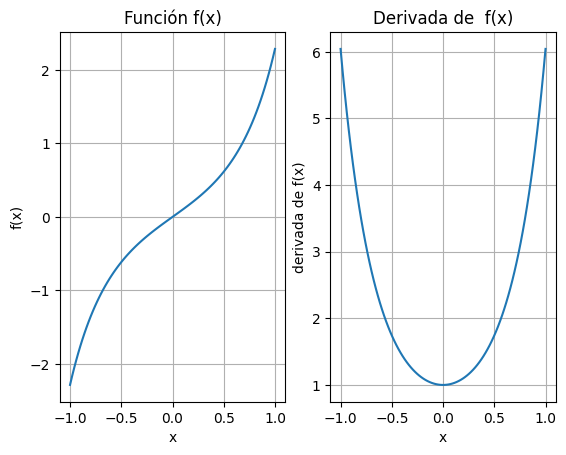

In [6]:
fun = lambda x : np.exp(x**2)*np.sin(x)
fig,axs=plt.subplots(ncols=2,nrows=1)
ax=axs.flatten()
ax[0].plot(x,fun(x))
ax[0].set_title("Función f(x)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[1].plot(x,der)
ax[0].grid()
ax[1].grid()
ax[1].set_title("Derivada de  f(x)")
ax[1].set_xlabel("x")
ax[1].set_ylabel("derivada de f(x)")


Compruebe su solución empleando la derivada de sympy.

In [7]:
x = sp.Symbol("x")
x_=np.linspace(-1,1,100)
f= sp.exp(x**2)*sp.sin(x)
f

exp(x**2)*sin(x)

In [8]:
def der_simbolica(fun,x,orden):
  d1= sp.diff(fun,x,orden)
  d1_numpy = sp.lambdify(x,d1,"numpy")
  return d1_numpy



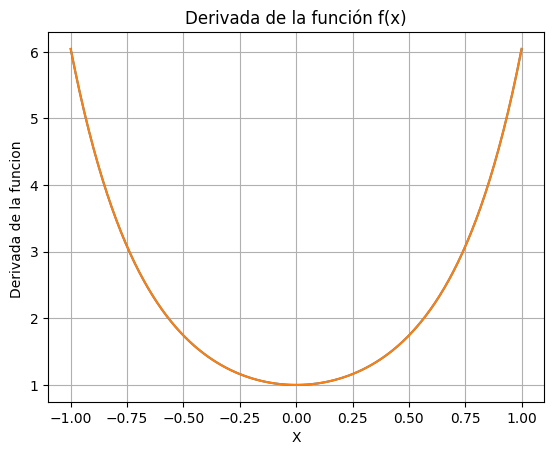

In [9]:
plt.plot(x_,der_simbolica(f,x,1)(x_))
plt.title("Derivada de la función f(x)")
plt.xlabel("X")
plt.ylabel("Derivada de la funcion ")
plt.plot(x_,der)
plt.grid()

La anterior gráfica se hizo con sympy y con el metodo de diferencias centrales : las dos curvas coindiciden en una sola de color naranja por lo que se comprueba la solución usando sympy

Analice que pasa con la derivada cuando varia el valor de h.

In [10]:
hs = np.array([1.5,1,0.5,0.1])

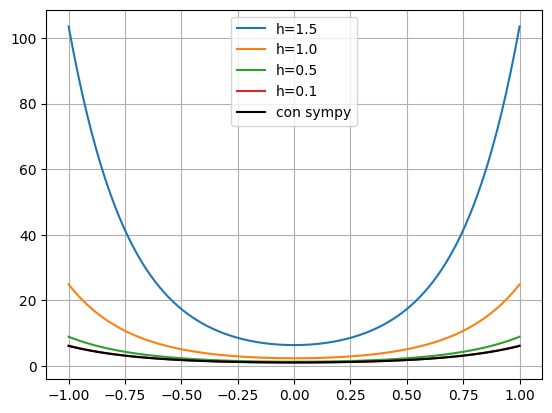

In [11]:
funs = lambda x : np.exp(x**2)*np.sin(x)
xs = np.linspace(-1,1,100)


for i in range(len(hs)):
  ders= dif_centrales(funs,xs,hs[i])
  plt.plot(xs,ders,label=f"h={hs[i]}")
  plt.legend()

plt.plot(x_,der_simbolica(f,x,1)(x_), color="black", label="con sympy")
plt.grid()
plt.legend()
plt.show()







Se observa en la anterior grafica  que las variaciones de h producen variaciones en las curvas de las derivadas. A medida que se disminuye el valor de h, las curvas de las derivadas se acercan más a la obtenida con sympy.

2)Construya una función que permita calcular el método de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.

In [24]:
link = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv"
df=pd.read_csv(link)
df

,Unnamed: 0,Tiempo[ms],AnguloDeg,AnguloRad
0,0,9,-30.710388,-0.535997
1,1,42,-30.017673,-0.523907
2,2,75,-28.762547,-0.502001
3,3,108,-26.507523,-0.462644
4,4,142,-24.611229,-0.429547
...,...,...,...,...
2842,2842,94709,4.937576,0.086177
2843,2843,94743,6.479851,0.113095
2844,2844,94776,7.940689,0.138591
2845,2845,94809,9.318092,0.162631


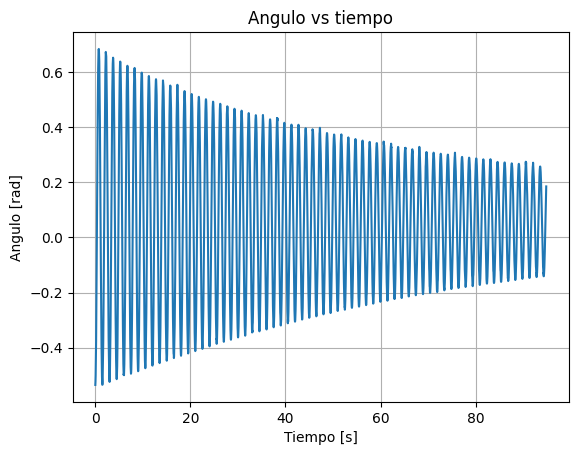

In [61]:
# se grafica angulo en radianes vs tiempo
angulo = df.AnguloRad
angulos = np.array(angulo)

tiempo = df["Tiempo[ms]"]
tiempos = np.array(tiempo)

plt.plot(tiempos*1e-3,angulo)
#plt.scatter(tiempo,angulo)
plt.xlabel("Tiempo [s]")
plt.ylabel("Angulo [rad]")
plt.title("Angulo vs tiempo")
plt.grid()
plt.show();

In [97]:
#derivada por el metodo de diferencias centrales

def dif_centrales2(tiempos,angulos):
  diferencias = np.zeros_like(angulos)
  h = (tiempos[-1]-tiempos[0])/(len(tiempos)-1)

  for i in range(len(angulos)):
   if (i+2) < len(angulos):
      diferencias[i]=angulos[i+2]-angulos[i]
   else:
    pass
  der2= diferencias/(2*h)
  return der2




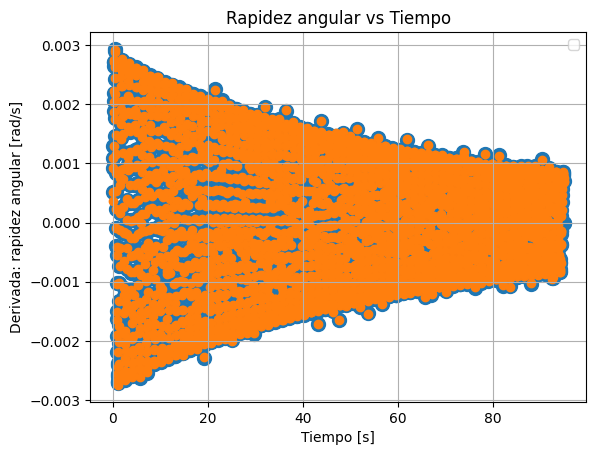

In [114]:

#plt.plot(tiempos*1e-3,dif_centrales2(tiempos,angulos),label="metodos centrales")
plt.scatter(tiempos*1e-3,dif_centrales2(tiempos,angulos),s=100)
# se aplica metodo np.gradient para comparar y ver si esta bien
y=np.gradient(angulos,tiempos)
#plt.plot(tiempos*1e-3,y, markersize=10, label="gradiente")
plt.scatter(tiempos*1e-3,y)
plt.xlabel("Tiempo [s]")
plt.ylabel("Derivada: rapidez angular [rad/s]")
plt.title("Rapidez angular vs Tiempo")
plt.legend()
plt.grid()
plt.show();


Se compara el metodo establecido con la funcion con los valores obtenidos con np.gradiente, se hace una grafica con los resultados obtenidos por los dos metodos,coinciden como se observa en la anterior grafica

3)Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de  kqtop  empleando:

La librearia sympy.

De la primera expresion se obtiene:
\begin{equation}
       \frac{V}{kq_{tot}}=\frac{1}{\sqrt{z^2 + R^2 }}
\end{equation}

In [15]:
# se define z simbolico
z = sp.Symbol("z")

# un arreglo z_ donde esten 100 valores de z en metros , en este caso de 0 a 0.001 metros o de 0 a 1 mmm
z_ = np.linspace(0,0.001,100)

# Radio simbolico
R = sp.Symbol("R")

# radio en metros que nos dan en el ejercicio
R_ = 0.1e-3


""" La ecuación V/ kqtot con R=0.1e-3 metros,  en sympy, es igual a  """
V_kq = 1/ ((z**2) + ((R_)**2))**(1/2)
V_kq

(z**2 + 1.0e-8)**(-0.5)

El campo electrico se calcula asi:
\begin{equation}
      E=kq_{tot}×-\frac{d}{dz}(\frac{1}{\sqrt{z^2 + R^2 }})
\end{equation}

In [16]:
""" la derivada de V/ kqtot  con respecto a z es  """
d1 = -sp.diff(V_kq,z,1)

print("El campo electrico reescalado  en unidades de  kqtop con R=0.1e-3m es: \n")
d1

El campo electrico reescalado  en unidades de  kqtop con R=0.1e-3m es: 



1.0*z/(z**2 + 1.0e-8)**1.5

In [17]:
# se convierte de formato sympy a numpy y se evalua la funcion en un z>0 para obtener campos
#electricos medidos en Vm

d1_numpy = sp.lambdify(z,d1,"numpy")
E_kq= d1_numpy(z_)

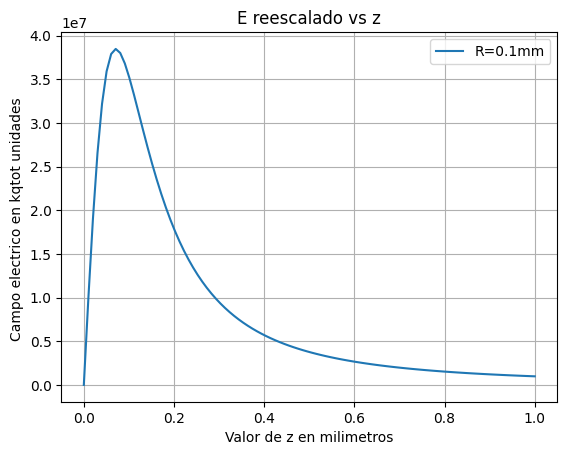

In [18]:
plt.plot(z_*1000,E_kq, label=f"R={R_*1000}mm") # multplico por 1000 para dejar x en mm
plt.xlabel("Valor de z en milimetros")
plt.ylabel("Campo electrico en kqtot unidades ")
plt.title("E reescalado vs z")
plt.grid()
plt.legend()

Calcular el campo en el punto  z=0.1mm  empleando el metodo np.grad

In [19]:
# al potencial lo convierto en una funcion de sympy
V = sp.lambdify(z,V_kq,"numpy")

z_2 = np.linspace(0,0.001,100) # de 0 a 0.001 metros o de 0 a 1 milimetros

# hallo el potencial en funcion de z en metros
V = V(z_2)

# se halla el campo electrico usando np.gradient(derivada )
campo = -np.gradient(V,z_2)

In [20]:
z_3 = z_2 *1000 # hago la conversion de metros a mm

e = np.zeros_like(z_3)

# determino cual es el valor de z_3 que se acerca más a 0.1 mm

for i in range(len(z_3)):
  # en este caso resto los valores de z_3 con 0.1 y las diferencias las guardo
  #en  el arreglo e
  e[i] = abs(0.1 - z_3[i])

#hallo la diferencia minima y determino su indice, este indice lo aplico al
# arreglo campo para hallar el valor de campo en el valor aproximado a z=0.1
minimo = np.min(e)
indice = np.where(e==minimo)
print("El campo electrico en el punto z=0.1mm es ",campo[indice],"kqtot unidades")

El campo electrico en el punto z=0.1mm es  [35132794.17787951] kqtot unidades


Calcular el campo para diferentes valores de z con z>0,, empleando np.grad Construya un gráfico de E vs z

In [21]:
df=pd.DataFrame()
z_mm=z_2 *1000
df["Valores de z>0 [mm]"]= z_mm[1:]
df["Campo electrico[kqtot unidades]"] =campo[1:]
df.head()

,Valores de z>0 [mm],Campo electrico[kqtot unidades]
0,0.010101,9.801980e+06
1,0.020202,1.876683e+07
2,0.030303,2.624427e+07
3,0.040404,3.188184e+07
4,0.050505,3.563082e+07


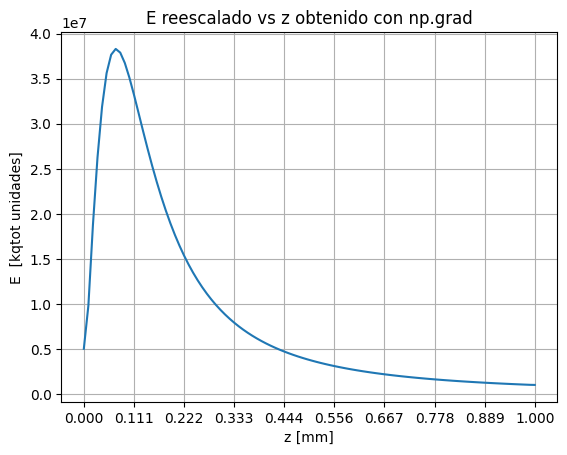

In [22]:
plt.plot(z_2*1000,campo)
plt.xlabel("z [mm]")
plt.ylabel("E  [kqtot unidades]")
plt.title("E reescalado vs z obtenido con np.grad")
xt=np.linspace(0,1,10)
plt.xticks(xt)
plt.grid()